# <center> TWITTER SENTIMENT CLASSIFICATION 
## <center> (CLIMATE CHANGE)

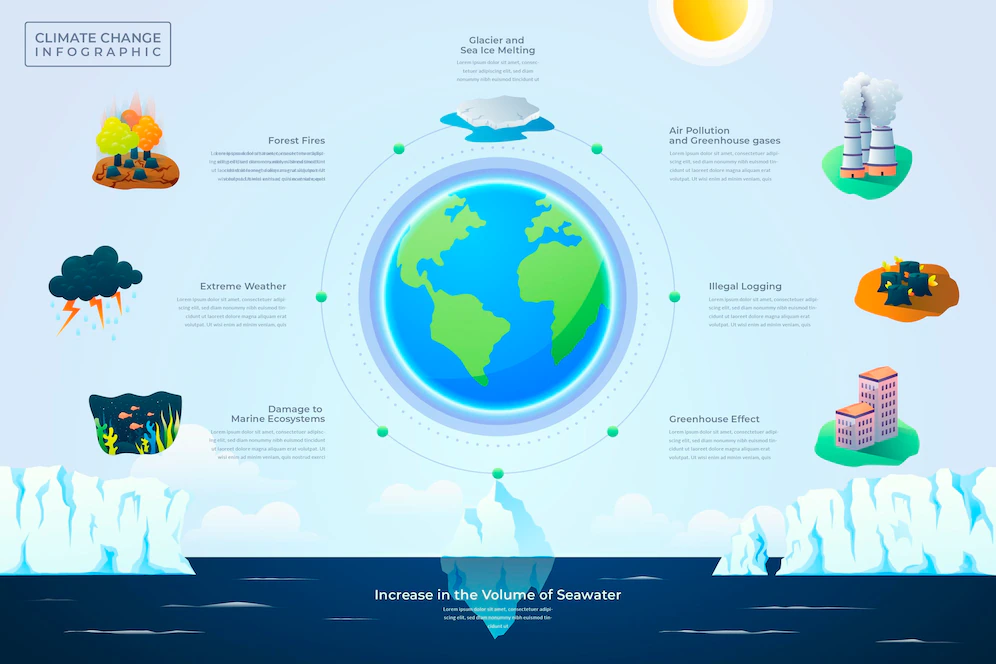

## PARBI TECH CONSULTANCY
<div class="alert alert-block alert-success">
<b> PARBI Tech Consultancy offers data and analytics services that allow for data-driven insights, well-timed and informed decisions, and continually positions clients ahead of the curve.
    </div>
    

### The TEAM behind PARBI Tech Consultancy

- PARBI's tech team is made up of **five Data Scientists** who work tirelessly and in tandem to ensure quick and effective turn around times for our clients' projects while delivering high-quality results.
- The Tech Team consists of :
                               - Mr Alatishe Qudus
                               - Mr Bongani Mavuso
                               - Mr Isaac Ifinju
                               - Mr Peter Okeke 
                               - Ms Rumbidzai Chitongo                  


## Project Overview: 

- Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received. 




## Problem Statement

Today, climate change is a worldwide hazard affecting our society. However, there appears to be a discrepancy (a problem worth mentioning) between legitimate scientific discoveries on the true nature of climate change and climate change propaganda, politicians exploit to gain cheap political points. As a result, there is a tremendous divide among the people, both offline and online, such as on Twitter, over how they interpret climate change. Hence, commercial organizations both small and large are in a perilous situation, in that they want to know what is the optimal modus operandi position to adopt, i.e. anti, pro, or neutral, in relation to climate change. Thus, this project focuses on developing climent change classifier models that predict twitter users' sentiment on climent change using thousands of tweets as the dataset. 

## Data Provided

### Source of Data
- The University of Waterloo, Canada collected the data used for the project and was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### Class Description
<div class="alert alert-warning">
<b>

- **1 (Anti)**: symbolizes a tweet that does not believe in man-made climate change. 

- **0 (Neutral)**: symbolizes a tweet that neither supports nor refutes the belief of man-made climate change

- **1 (Pro)**: symbolizes a tweet that strongly supports the belief of man-made climate change

- **2 (News)**: symbolizes a tweet that links to factual news about climate change
</div>

### Data Features

- **sentiment**: Describes which class a tweet belongs in (refer to Class Description above)

- **message**: Gives the Tweet body

- **tweetid**: Describes a Twitter's unique id

    
## Objectives
The main objective of this project was to build multiple classifier models capable of predicting the sentiment of Twitter Users as regards clament change with a 70 to 80 percent degree of accuracy. Specifically, the project focused on the following:
- Determined the total number of messages in each of the sentiment class (Anti. Neutral. Pro, News)
- Assessed the top 10 hashtags prevalent in each sentiment class
- Examined the wordcloud for each sentiment class
- Developed five classifier models capable of predicting climent change sentiment using F1-score as judgement parameter 
    

<a id="cont"></a>

## Table of Contents

- The project breakdown covered the following:. 

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>
    
<a href=#seven>8. Conclusion</a>
    
<a href=#seven>9. Kaggle Model Submissions</a>
    
<a href=#seven>10. References</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
-  The following libraries among others were imported and used in the course of this project:

     **NLTK**: A leading library for building Python programs to work with human language data providing easy-to-use interfaces
     
     **Numpy**: Used for mathematical computations on the data.
     
     **Pandas**: Used primarily for dataframe and also for data manipulation and normalization etc.
     
     **Matplotlib**: Used for data visualization.
     
     **Seaborn**: Built upon matplotlib; used for more customizable data visualizations.
     
     **Sklearn**: Used for Machine learning operations - it is a library that contains efficient tools for machine learning       and statistical modeling as well as data preprocessing and model building.
---

In [1]:
''' Libraries for data loading, data manipulation and data visulisation '''

# for data manipulation and datafram
import numpy as np
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # set plot style

# for text processing and manipulation
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# for creating pickles for the Streamlit app
import pickle

# for preprocessing characters and words
import string
from string import printable
from spellchecker import SpellChecker
import re # to check if a particular string matches a given regular expression
import urllib # to fetch URLs

# for data balancing 
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# libraries for different models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# tools for preprocessing the data for predictive analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, tree, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


# ignore warning 
import warnings
warnings.filterwarnings('ignore')
 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Rumi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rumi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Rumi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
In this section, the train.csv and test.csv files were loaded using Pandas DataFrame.

- The help of pandas' read_csv() method was exploited to load the data.
---

In [2]:
# Loading the train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv') 

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
The EDA step is critical because it allows the team to analyze any patterns in the data, identify any outliers, and suggest any correlations between variables. These portions aided the team in comprehending the data without making any assumptions. It aided in providing context and direction on the best course of action to pursue while constructing the suitable model. As a consequence, EDA is a critical component before the team continues with the modeling and assists in appropriately interpreting the findings, allowing the team to completely comprehend the data.
Exploring datasets aids in obtaining a thorough comprehension of the data. Before proceeding with the data description, it is clear from the csv files that the data has already been divided into train and test sets. As a result, these sets were investigated separately. This part investigates all of the dataframes by looking at the data kinds and evaluating the features included in them, followed by a look at the dataset summary statistics. 

In this section, the team started by performing basic analysis which were entailed:

- (a) Looking at the data sample
- (b) Finding out the number of rows and columns (plus their respective data types) in the dataset
- (c) Interogating some summary statistics for numerical columns
- (d) Checking for null values

---


### Basic Analysis

In [3]:
#finding the shape of the data
print(train.shape)
print(test.shape)

(15819, 3)
(10546, 2)


- it is noted that the train and test data consists of 15 819 rows, three columns and 10 546 rows, two columns, respectively.

The next step taken is to have a brief view into the data sets to know the names of the columns and see the how the data looks like.

In [4]:
# Looking at a sample from the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
# Looking at a sample from the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


- Looking at the top five rows of our train and test data, it is noted that both datasets contain raw tweet data repsective of a particular `tweetid`. All the data features can be seen as well as the types of data to work with. 

  The features of the data are: 

                            - sentiment
                            - message
                            - tweetid

- The train data contains the `sentiment` column indicating the different sentiment classes, however this column is not found in the test dataset because it is the target varaible (y-value) to be predicted by the built model. 


The types of visualisations that can be created differ depending on the data type of each variable. Broadly, more analysis were conducted to determine whether a variable is numerical, or categorical. it was obvious that the categorical feature is `message`, while the `sentiment` and `tweetid` features are numerical. This was confirmed in the next step by looking specifically at the data type of each feature.


In [6]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB
None


- The info command confirmed the categorical and numerical features. If a feature (variable) is a string (text) the Dtype is **object** and if it is a numerical variable the Dtype is an **int64** or **float64**. This command also revealed that out of the 15819 rows in the train dataset and 10546 rows in the test dataset, none of the features contain any null values.

Null values for each feature can also be checked by using the following command:

    - df.isnull().sum()
    
This command provided the total number of null values in each feature.

In [7]:
#checking for null values in train and test data
train.isnull().any()
test.isnull().any()

message    False
tweetid    False
dtype: bool

- As observed initially above using the info command, there are no empty rows withing both datasets, meaning no null values.


Next step is to count how many of each class description is there within the train data, this helped to reveal the dormant and minority classes. A bar plot showing the distribution of each class was also plotted.

In [8]:
# checking out total number of sentiments
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

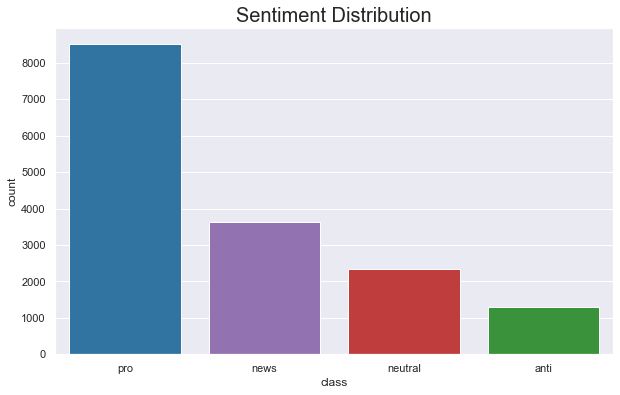

In [9]:
# creating new labels for the classes
train['class'] = train['sentiment'].map({-1: 'anti', 0: 'neutral', 1: 'pro', 2: 'news'})

# plotting the bar plot
plt.figure(figsize=(10,6))
sns.countplot(x="class", data=train, palette=['tab:blue', 'tab:purple', 'tab:red', 'tab:green'])
plt.title("Sentiment Distribution", fontsize=20)
plt.show()


- The figure above shows that the pro-climate change class is more dorminant as compared to the rest of the classes with the anti-climate change class having the lowest values. 
- As a result of this, having marginally uneven classes of data will affect the precision of any classifier model in predicting the minority classes. This problem of imbalanced data will be tackled further in the Data Engineering phase before Model building. 


The next step is to briefly view data samples from each individual sentiment class separately.


<div class="alert alert-block alert-success">
<b> 'Anti' Class Data
</div>

In [10]:
# checking the sample data for the "anti" class tweets. 
train[train['sentiment'] == -1].head(10)

,sentiment,message,tweetid,class
28,-1,Sally Kohn’s latest evidence of climate change...,355491,anti
46,-1,@realDonaldTrump Carbon Tax is a Globalist ide...,61141,anti
48,-1,RT @SteveSGoddard: We had winds close to 100 M...,719523,anti
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385,anti
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263,anti
107,-1,RT @Fruitloopian: Why is there snow in March i...,798585,anti
113,-1,can someone pls explain to me why it's -37 in ...,337974,anti
116,-1,Explain that my global warming advocates. http...,472265,anti
121,-1,@TomiLahren kinda funny the professors talk sh...,740194,anti
129,-1,RT @signordal: New global warming study is ter...,473664,anti


<div class="alert alert-block alert-success">
<b>'Neutral' Class data
</div> 

In [11]:
# checking the sample data for the "neutral" class tweets.
train[train['sentiment'] == 0].head(10)

,sentiment,message,tweetid,class
19,0,Calum: *tweets abt reunitingish w the cast*\n-...,547924,neutral
22,0,"we also met this guy, he let us in on some tru...",67545,neutral
30,0,@Jnp_Ftw are these the same scientists that de...,365051,neutral
39,0,We’ ve dealt with simple issues like climate c...,403368,neutral
43,0,RT @andrewsharp: Win probability is bullshit m...,326916,neutral
52,0,Chris: Who is it then that initially talked ab...,352623,neutral
53,0,Do you approve of the executive order @realDon...,785637,neutral
58,0,@GlennF They are calling to the great Space Cy...,113396,neutral
64,0,RT @fuckofflaine: @jJxrry @SpaceX @QuebanJesus...,645201,neutral
67,0,RT @Hope012015: China tells Trump that climate...,687045,neutral


<div class="alert alert-block alert-success">
<b>'Pro' Class data
</div> 

In [12]:
# checking the sample data for the "pro" class tweets.
train[train['sentiment'] == 1].head(10)

,sentiment,message,tweetid,class
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro
1,1,It's not like we lack evidence of anthropogeni...,126103,pro
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,pro
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,pro
5,1,Worth a read whether you do or don't believe i...,425577,pro
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933,pro
7,1,RT @makeandmendlife: Six big things we can ALL...,992717,pro
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510,pro
9,1,RT @paigetweedy: no offense… but like… how do ...,260471,pro
10,1,RT @StephenSchlegel: she's thinking about how ...,295793,pro


<div class="alert alert-block alert-success">
<b>'News' Class data
</div> 

In [13]:
# checking the sample data for the "news" class tweets.
train[train['sentiment'] == 2].head(10)

,sentiment,message,tweetid,class
2,2,RT @RawStory: Researchers say we have three ye...,698562,news
12,2,RT @tveitdal: We only have a 5 percent chance ...,454673,news
14,2,Fossil fuel giant ExxonMobil ‘misled’ the publ...,658092,news
26,2,Bangladesh confronting climate change head on ...,365291,news
32,2,RT @latimes: Atmospheric rivers fueled by clim...,143471,news
36,2,RT @Independent: Trump's team removed climate ...,526603,news
41,2,2050 climate targets: nations are playing the ...,8984,news
44,2,RT @washingtonpost: The Alaskan tundra is fill...,905639,news
45,2,RT @TheTorontoSun: From @sunlorrie: Indian env...,741568,news
49,2,RT @Starbuck: World food supplies at risk as #...,499888,news


- The train dataset has few data feautures which are not substantial enough and thus makes it harder to gain a better insight into the data presented for the project. The next step is therefore to try and de-sample the `message` featire and create numerical features from it in an effort to use this numerical data for graphical and non-graphical EDA while gaining better understanding of the target variable's relationships with the tweet messages.


#### Creating numerical features

- A few functions were written to help extract meaningful insights from the `message`feature which helped with performing some descriptive statistics on the data as well as create meaningful graphs.


<div class="alert alert-block alert-success">
<b>(a) Creating a number of words column:
</div> 


In [14]:
# adding a column of the count of number of words in the tweets
def add_num_of_words(df):
    
    # Create a new column named 'num_of_words'
    df['num_of_words'] = 0

    # Iterate over the rows in the dataframe
    for i, row in df.iterrows():
        # Split the message column into a list of words
        words = row['message'].split()

        # Count the number of words in the list and store the value in the new column
        num_of_words = len(words)
        df.loc[i, 'num_of_words'] = num_of_words

    return df

train = add_num_of_words(train)

In [15]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10


- The number of words in each tweet has been counted and added to the new column successfully. The next step will be to create and add a count of unique words.


<div class="alert alert-block alert-success">
<b>(b) Creating a number of unique words column:
</div> 


In [16]:
# adding a column of the count of number of unique words in the tweets
def add_uniquewords(df):
    uniquewords = []
    for tweet in df['message']:
        words = tweet.split(' ')
        uniquewords.append(len(set(words)))
    df['uniquewords'] = uniquewords
    return df

train = add_uniquewords(train)

In [17]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words,uniquewords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19,19
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10,10


- Now that the column representing the count of unique words in each tweet have been successfully added, the next step is to create and a new column that counts number of characters in the tweet.


<div class="alert alert-block alert-success">
<b>(c) Creating a number of characters words column:
</div> 


In [18]:
# adding a column of the count of number of characters in the tweets
def add_char(df):
    df['num_of_char'] = df['message'].apply(lambda x : len(x))
    return df

train = add_char(train)

In [19]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19,19,140
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10,10,62


- Now that the column representing the count of number of characters in each tweet have been added, next step is to create a column that contains the count of stopwords.


<div class="alert alert-block alert-success">
<b>(d) Creating a number of stopwords column:
</div> 


In [20]:
# adding a column of the count of stopwords in the tweets
def count_stopwords(df):
    df['stopwords'] = df['message'].apply(lambda x: len([w for w in x.split() if w.lower() in stopwords.words('english')]))
    return df

train = count_stopwords(train)

In [21]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19,19,140,3
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10,10,62,4


- Now that the column representing the count of stopwords in each tweet have been added, next step is to create a new columns that contains the count of punctuations.


<div class="alert alert-block alert-success">
<b>(e) Creating a number of punctuations column:
</div> 



In [22]:
# adding a column of the count of number of punctuations in the tweets
def add_punc_col(df):
    punc_list = string.punctuation
    df['punctuations'] = df['message'].apply(lambda x: sum([1 for i in x if i in punc_list]))
    return df
  
train = add_punc_col(train)

In [23]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19,19,140,3,12
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10,10,62,4,1


- Now that the column representing the count of punctuations in each tweet have been added, next step is to create a new column that will contain the count of title case words in each tweet message.

<div class="alert alert-block alert-success">
<b>(f) Creating a number of title-case words column:
</div> 


In [24]:
# adding a column of count of number of title-case words in the tweets
def add_titlecase_column(df):
    
    #Creating a new list to store the title case words from each tweet
    titlecase = []
    
    #Looping through each row in the train dataframe
    for row in df.itertuples():
        #Splitting the tweet message into individual words
        words = row.message.split()
        #Creating a counter and setting it to 0
        count = 0
        #Looping through each word
        for word in words:
            #If the word is title case, increment the counter
            if word.istitle():
                count += 1
        #Adding the count to the titlecase_words list
        titlecase.append(count)
    
    #Adding the titlecase_words list as a new column to the train dataframe
    df['titlecase'] = titlecase
    
    #Returning the train dataframe
    return df

train = add_titlecase_column(train)

In [25]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19,19,140,3,12,0
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10,10,62,4,1,0


- Now that the column representing the count of title-case words in each tweet have been added, next step is to create a new column that contains the average length of words in a tweet message.



<div class="alert alert-block alert-success">
<b>(g) Creating a number of average words length column:
</div> 

In [26]:
# adding a column to count the average length of words in the tweets
def add_avg_word_len(df):
    df['avg_word_len'] = df['message'].apply(lambda x: np.mean([len(word) for word in x.split()]))
    return df

train = add_avg_word_len(train)

In [27]:
train.head(2)

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,pro,19,19,140,3,12,0,6.421053
1,1,It's not like we lack evidence of anthropogeni...,126103,pro,10,10,62,4,1,0,5.300000


- Now that all numerical columns have been created by desampling counts of the message feature, the next step will be to perform univariate analysis and multivariate analysis on the numerical features in the data in the sections that follow.


## Univariate Analysis (Non-graphical)

Univariate analysis is the most basic type of data analysis since it examines each variable in a data set independently. The primary goal of univariate analysis is to characterize the data and identify patterns within it. It considers the range of values as well as the values' core trend. It describes the variable's reaction pattern. It discusses each variable separately..

- The first univariate analyses were non-graphical. The descriptive statistics for each characteristic were examined in this section. This includes looking for outliers and examining how the data is skewed, i.e. the distribution that each data set follows. The following command will be used to compute descriptive statistics for each numerical attribute.: 
             
                                             - df.describe()
               
- This command returns the mean, standard deviation, and a five-number summary of each numerical attribute. The five-number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) is also used to generate the box plot. The three measures of central tendency are the mode, mean, and median.. 


<div class="alert alert-block alert-success">
<b> Descriptive Statistics
</div> 

In [28]:
# checking the discriptive statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
sentiment,15819.0,0.917504,0.836537,-1.000000,1.000000,1.000000,1.000000,2.00
tweetid,15819.0,501719.433656,289045.983132,6.000000,253207.500000,502291.000000,753769.000000,999888.00
num_of_words,15819.0,17.685062,4.443909,2.000000,15.000000,18.000000,21.000000,31.00
uniquewords,15819.0,17.112144,4.124631,2.000000,14.000000,18.000000,20.000000,30.00
num_of_char,15819.0,123.774132,23.332433,14.000000,114.000000,133.000000,140.000000,208.00
stopwords,15819.0,5.163221,2.925278,0.000000,3.000000,5.000000,7.000000,18.00
punctuations,15819.0,7.504141,3.447935,0.000000,5.000000,7.000000,10.000000,58.00
titlecase,15819.0,2.032303,1.540421,0.000000,1.000000,2.000000,3.000000,13.00
avg_word_len,15819.0,6.254392,1.238497,3.333333,5.363636,6.052632,6.941176,31.75


- Additional statistical measures that was calculated were **kurtosis** and **skew**. 

Kurtosis and skew are both statistical terminology used in data science. Kurtosis is a measure of the number of outliers in the data. **High kurtosis (>3)** denotes a high number of outliers, whereas **low kurtosis (3)** denotes a lack of outliers. Skew will demonstrate how symmetrical the data is, in other words, how it is distributed. The table below describes the range of values in terms of skew.


|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 



The commands used to determine the skew and kurtosis of data include:

        - df.skew()
        - df.kurtosis()
        

<div class="alert alert-block alert-success">
<b> Outlier Detection
</div> 

In [29]:
# checking for any outliers
train.kurtosis()

sentiment        0.122976
tweetid         -1.193356
num_of_words    -0.185399
uniquewords     -0.038303
num_of_char      1.721987
stopwords       -0.370223
punctuations     3.040057
titlecase        1.790924
avg_word_len    12.714517
dtype: float64

<div class="alert alert-block alert-success">
<b> Data Symmetry
</div> 

In [30]:
# checking the skewness of data
train.skew()

sentiment      -0.683959
tweetid        -0.008471
num_of_words   -0.400580
uniquewords    -0.467207
num_of_char    -1.412224
stopwords       0.432993
punctuations    0.526795
titlecase       1.086097
avg_word_len    1.365597
dtype: float64

- Results show that there are no outliers in all numerical features except for the `punctuations` feature and `avg_word_len` feature. 

- Looking at the distribution of data, the `tweetid`, `num_of_words`, `uniquewords`, `stopwords` and `punctuations` are observed to be fairly symmetrical. On the other hand, the `sentiment` feature is moderately negatively skewed while features involving the `num_of_char`, `titlecase` and `avg_word_len` have high negative and high positive features respectively. 

Now that all the non-graphical univariate analysis has been conducted, the best way to collaborate these findings is by creating some visuals for the data, enabling an enhanced understanding of the data distributions and behaviours.


## Univariate Analysis (Graphical)

Several plots can be applied to look at the distribution of any numerical feature and some of such plots include the following:

                - histogram
                - density plot
                - box plot
                - violin plot

- In this project the visuals utilized were **histogram**, **box plots** and **bar plots**. The Matplotlib library was used to display the histogram and bar plots simulatneously while the Seaborn library was used to display the box plots separately. 

Histograms are useful in determining the minimum data point, maximum data point, and the median. Similarly, Box plots are also useful in providing a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.


<div class="alert alert-block alert-success">
<b> Histrogram Plots
</div> 

    


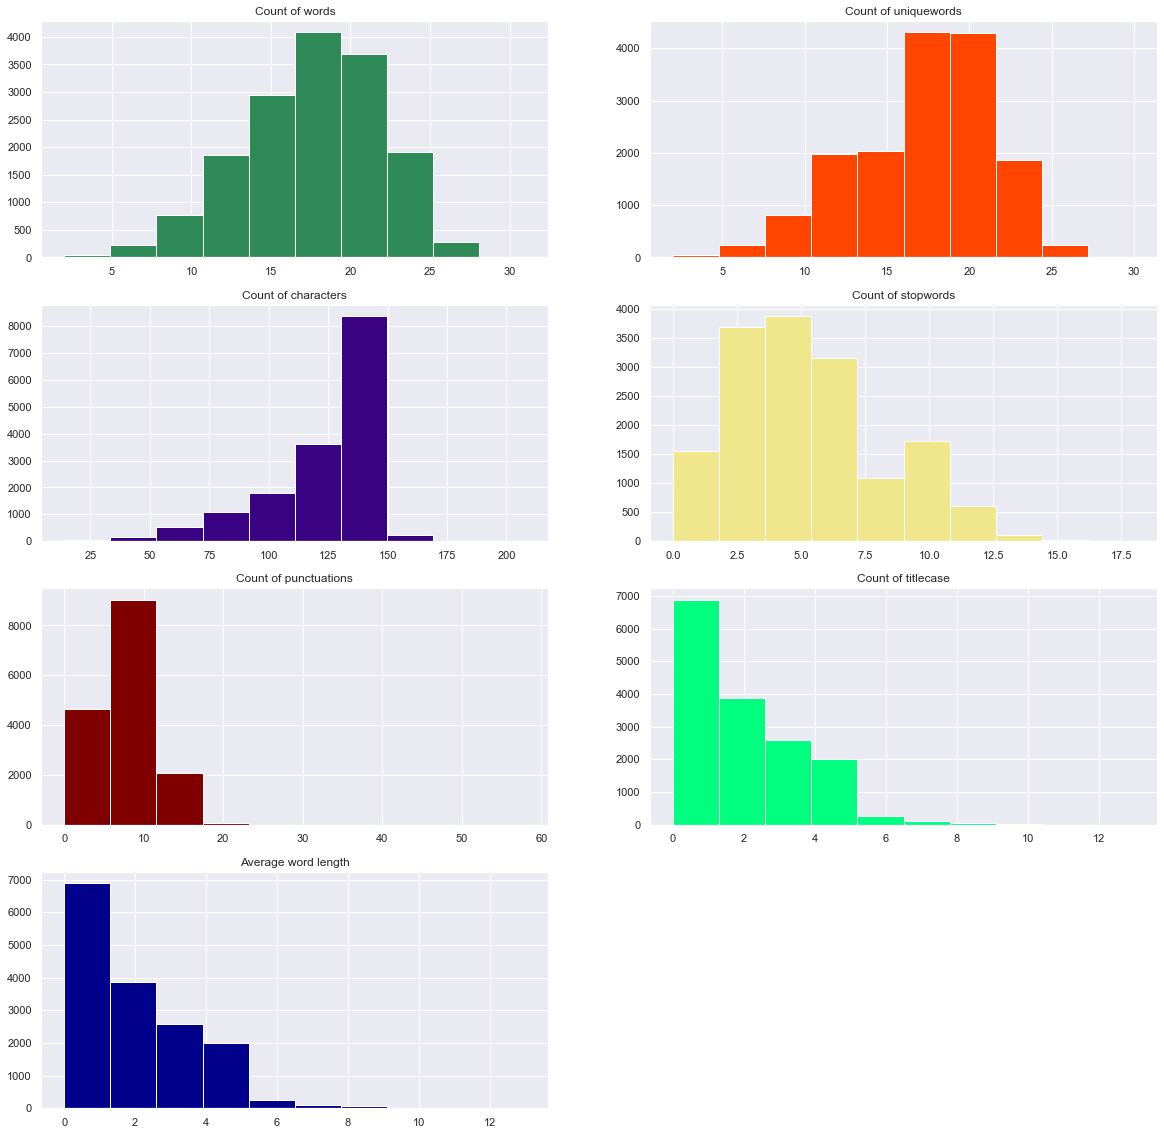

In [31]:
# creating features for the plots
num_of_words = train['num_of_words']
uniquewords = train['uniquewords']
num_of_char = train['num_of_char']
stopwords = train['stopwords']
punctuations = train['punctuations']
titlecase = train['titlecase']
avg_word_len = train['avg_word_len']

plt.figure(figsize=(20,20))

plt.subplot(4,2,1)
plt.hist(num_of_words,color='#2E8B57')
plt.title('Count of words')

plt.subplot(4,2,2)
plt.hist(uniquewords,color='#FF4500')
plt.title('Count of uniquewords')

plt.subplot(4,2,3)
plt.hist(num_of_char,color='#380282')
plt.title('Count of characters')

num_of_char
plt.subplot(4,2,4)
plt.hist(stopwords, color='#F0E68C')
plt.title('Count of stopwords')

plt.subplot(4,2,5)
plt.hist(punctuations, color='#800000')
plt.title('Count of punctuations')

plt.subplot(4,2,6)
plt.hist(titlecase, color='#00FF7F')
plt.title('Count of titlecase')

plt.subplot(4,2,7)
plt.hist(titlecase, color='#00008B')
plt.title('Average word length')

plt.show()

- The information rendered by the histograms above displaying the distribution of the data tallied with the summaries of the descriptive statistics performed previously. The high positive skewness of the `titecase` and `avg_word_len` features together with the high negative skewness of the `num_of_char` features could be visibly noted. The same applied to the fairly symmetrical distributions shown by the remaining features. 

The next graphical plots involved Box Plots. The seaborn library was be used to create Box Plots on all numeric features.The plots were done separately as it was difficult to plot box plots simulataneously when using unscaled data.


<div class="alert alert-block alert-success">
<b> Box Plots
  
</div> 




<b> (a) Count of Words


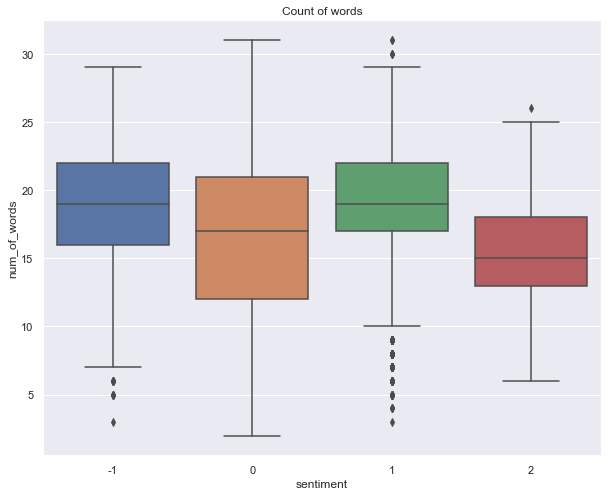

In [32]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='num_of_words', data=train).set(title='Count of words')
plt.show()


<b> (b) Count of Uniquewords

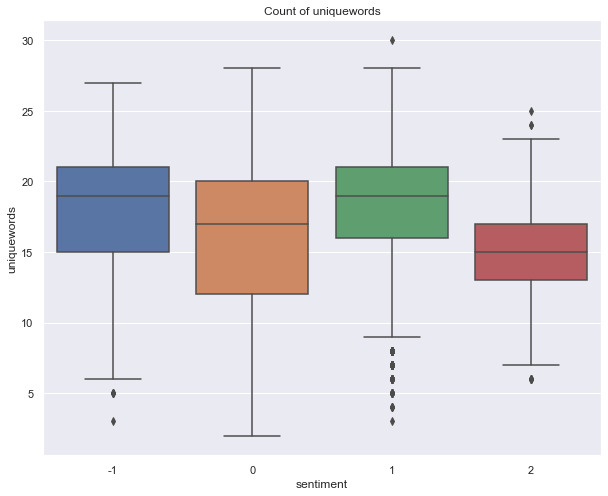

In [33]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='uniquewords', data=train).set(title='Count of uniquewords')
plt.show()


<b> (c) Count of Characters

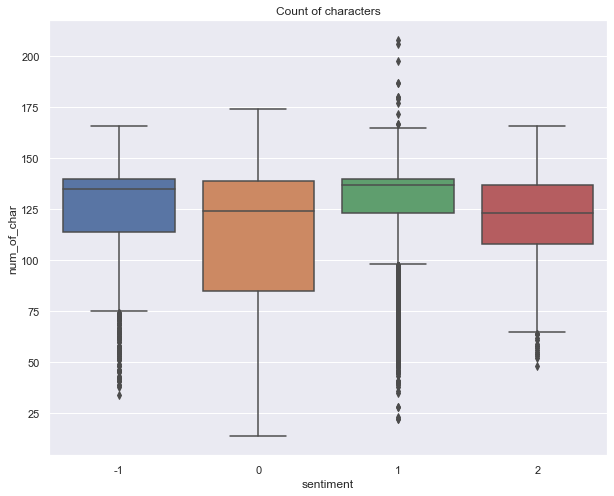

In [34]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='num_of_char', data=train).set(title='Count of characters')
plt.show()


<b> (d) Count of Stopwords

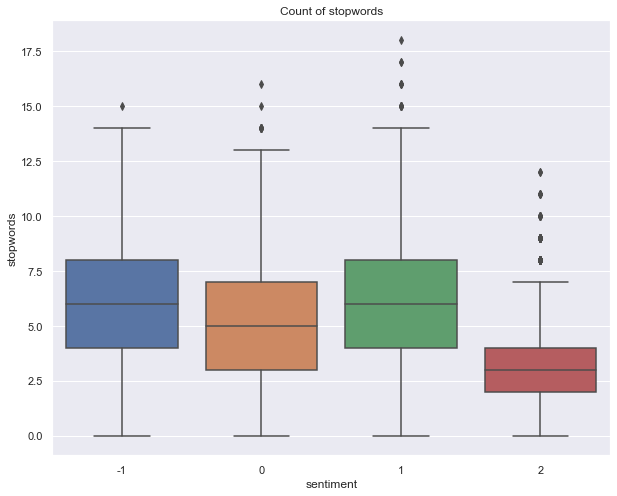

In [35]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='stopwords', data=train).set(title='Count of stopwords')
plt.show()


<b> (e) Count of Punctuations

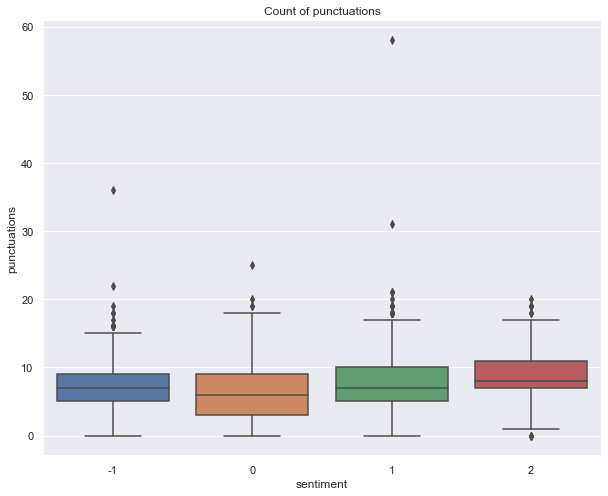

In [36]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='punctuations', data=train).set(title='Count of punctuations')
plt.show()


<b> (f) Count of Titlecase

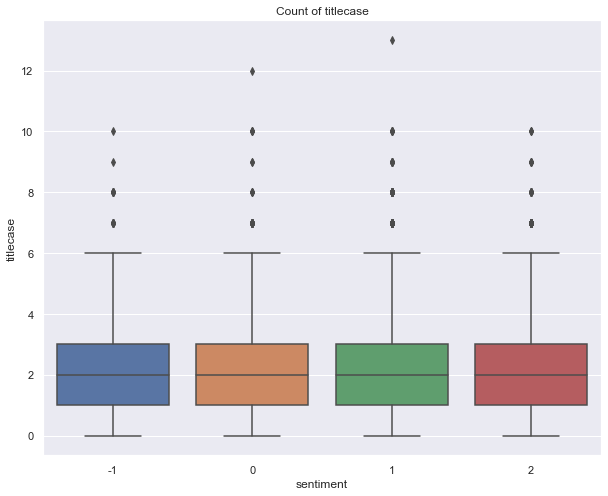

In [37]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='titlecase', data=train).set(title='Count of titlecase')
plt.show()


<b> (g) Average Length of Words
 

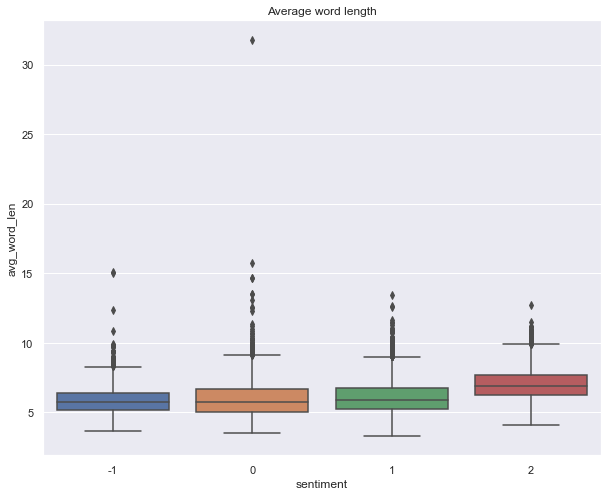

In [38]:
# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(10,8))
 
# drawing the plot
sns.boxplot(x='sentiment', y='avg_word_len', data=train).set(title='Average word length')
plt.show()

- A modest variation in word count was detected across the four classes, despite the fact that the 'pro'class had the highest count, followed by the 'anti'class. The 'neutral' class had a wider range for the variable and the lowest Q1 score. This conclusion is corroborated by the count of unique words, which revealed small variances between classes, with the 'neutral' class having the largest range and the lowest Q1 score. However, because the 'pro' class had more data values, it had a higher number for the count of unique words variable than the 'against' class, which had a similar Q3 score. When the number of characters was counted, all four classes had fairly identical Q3 scores, but the 'pro' class had the most data values, followed by the 'against' class. 



- This tendency corresponds to the trend seen in the number of words and the number of unique words. When the box plots for count of stopwords were examined, the plot followed a similar pattern to that of count of words and count of unique words. The similarities in these three plots might indicate a link between these three traits.



- The 'news' class had higher counts in the count of punctuation plot, although having somewhat lower Q3 values than the 'neutral' class, which had a lower count but a larger range. The box plots of titlecase count showed nearly little variation across classes. All plots seemed to have the same ranges and Q2 and Q3 scores. When it comes to the average length of words feature, the 'news' class had a distinct advantage in terms of counts. The 'neutral' and 'pro' classes appeared to have identical Q3 ratings, whereas the 'neutral' class had a lower Q1 score.. On the other hand, the `anti` class showed a similar Q1 score to the `pro` class but had the lower Q3 score. 
 
 
 
- Due to the difficulties in distinguishing the highest Q3 or Q1 scores across the numerous classes, a better approach to presenting these findings in the form of bar plots for each particular attribute was suggested. When comparing distinct sets/classes of data among different groups, bar charts come in handy. They depict the connection using two axes, with the categories on one and the discrete values on the other. These charts can reveal any significant changes in data over time.

<div class="alert alert-block alert-success">
<b> Bar Plots
  
</div> 
    


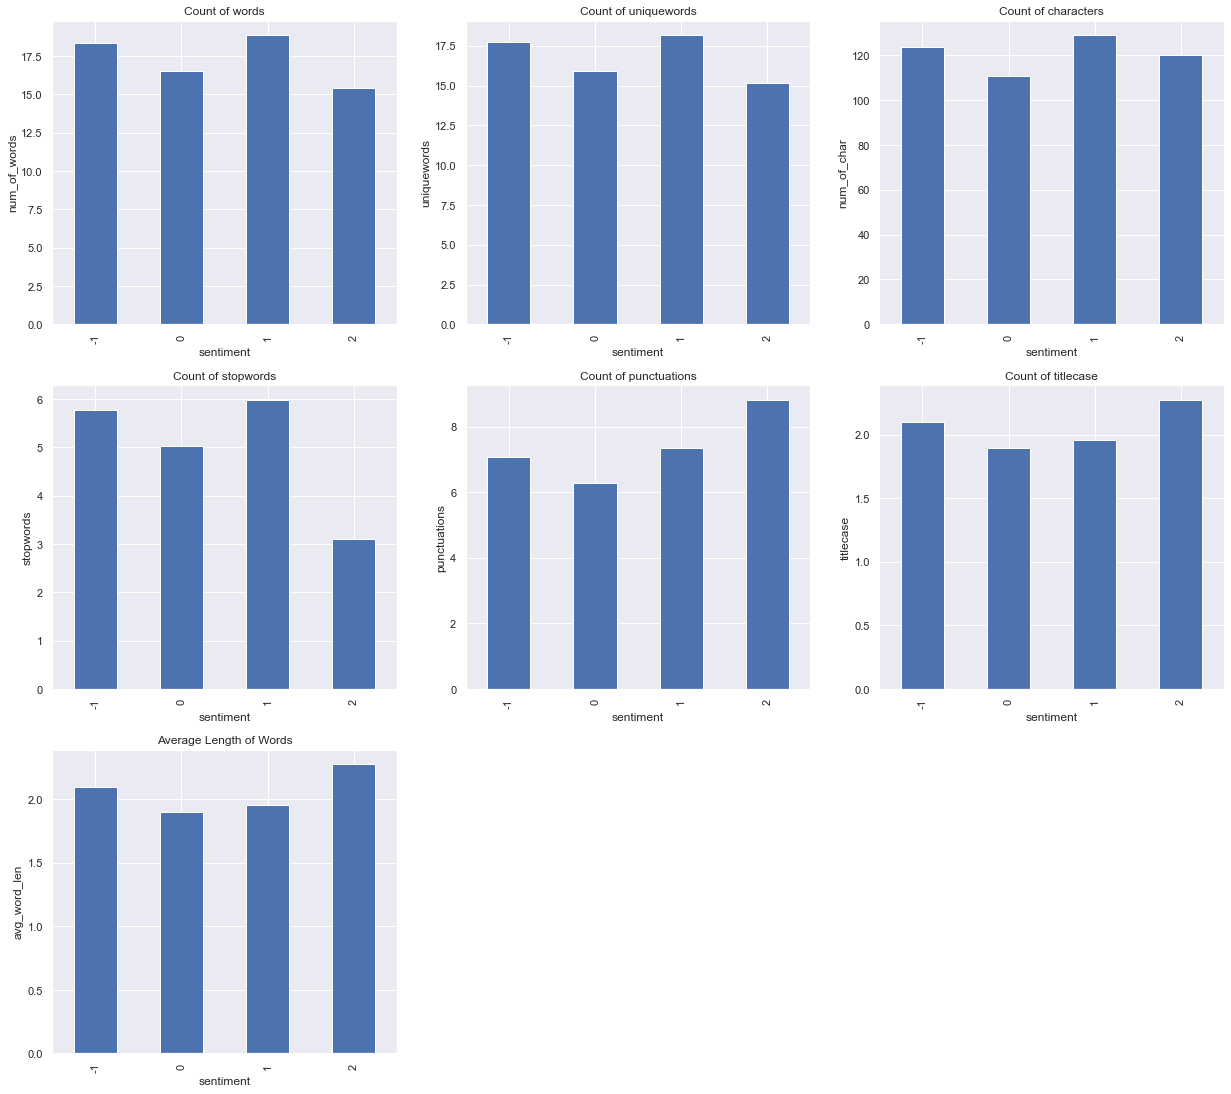

In [39]:
# Set the figure size
plt.figure(figsize=(21, 19))

# plot the bar graph for each of the numerical columns
plt.subplot(3, 3, 1)
train.groupby('sentiment').num_of_words.mean().plot(kind='bar')
plt.title('Count of words')
plt.ylabel('num_of_words')

plt.subplot(3, 3, 2)
train.groupby('sentiment').uniquewords.mean().plot(kind='bar')
plt.title('Count of uniquewords')
plt.ylabel('uniquewords')

plt.subplot(3, 3, 3)
train.groupby('sentiment').num_of_char.mean().plot(kind='bar')
plt.title('Count of characters')
plt.ylabel('num_of_char')

plt.subplot(3, 3, 4)
train.groupby('sentiment').stopwords.mean().plot(kind='bar')
plt.title('Count of stopwords')
plt.ylabel('stopwords')

plt.subplot(3, 3, 5)
train.groupby('sentiment').punctuations.mean().plot(kind='bar')
plt.title('Count of punctuations')
plt.ylabel('punctuations')

plt.subplot(3, 3, 6)
train.groupby('sentiment').titlecase.mean().plot(kind='bar')
plt.title('Count of titlecase')
plt.ylabel('titlecase')

plt.subplot(3, 3, 7)
train.groupby('sentiment').titlecase.mean().plot(kind='bar')
plt.title('Average Length of Words')
plt.ylabel('avg_word_len')

plt.show()

    
- The 'pro' class was shown to have greater counts in four features: word count, unique word count, character count, and stopword count. The 'anti' class, on the other hand, followed a similar pattern while having somewhat less counts than the 'pro' class. This is to demonstrate that both classes have about identical length tweet messages with slightly varying numbers of the four attributes. The 'pro' class was also found to contain less punctuations than the 'news' class, as well as lower counts of title case and average word length when compared to the 'against' and 'news' classes This finding might be attributed to the 'pro' class tweets varying in length as well as having more opinionated content than the other classes.

 
- In just three features, the 'neutral' class had lower numbers than the 'against' and 'pro' classes but higher than the 'news' class (count of words, count of unique words, count of stopwords). The 'neutral' class had the lowest counts in the following four aspects, although the numbers were always lower than those of the 'against' and 'pro' groups.


- In the count of punctuation, count of titlecase, and average length of words plots, the 'news' class had greater counts than the other classes. This result demonstrated that, although having the lowest number of words and unique words, the 'news' class had a higher number of punctuations, title cases, and average word length. This observation might be linked to a type of tweet that solely refers to news that has been covered in news stories and is lacking in opinionated tweets. Because the duration of the tweets remains approximately comparable, tweets of this class would carry a majority of headlines and titles, resulting in increased punctuation, title case counts, and higher average word length.

### Multivariate Analysis: Non-Graphical 

- This analysis helps to determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases and vive versa. There are three different correlation measures:

    - Pearsons' correlation 
    - Spearman rank correlation
    - Kendall correlation

For this project, the Pearsons' correlation was employed for analysis. The Pearsons' correlation measures the linear relationship between features and assumes that the features are normally distributed. Below is a table that explains the interpretation of Pearsons' correlation measure:


|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 



The command useed to determine the correlation between features is:

                    - df.corr()

In [40]:
train.corr()

,sentiment,tweetid,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
sentiment,1.000000,-0.003758,-0.127068,-0.108296,0.052893,-0.226360,0.192352,0.051128,0.254452
tweetid,-0.003758,1.000000,0.005321,0.008405,0.005774,0.004389,-0.001915,0.007896,-0.009794
num_of_words,-0.127068,0.005321,1.000000,0.975836,0.781325,0.757346,-0.091977,0.238636,-0.657610
uniquewords,-0.108296,0.008405,0.975836,1.000000,0.782994,0.717898,-0.075777,0.242937,-0.627771
num_of_char,0.052893,0.005774,0.781325,0.782994,1.000000,0.410358,0.326735,0.221695,-0.091071
stopwords,-0.226360,0.004389,0.757346,0.717898,0.410358,1.000000,-0.280493,0.025233,-0.682284
punctuations,0.192352,-0.001915,-0.091977,-0.075777,0.326735,-0.280493,1.000000,0.070910,0.503361
titlecase,0.051128,0.007896,0.238636,0.242937,0.221695,0.025233,0.070910,1.000000,-0.134879
avg_word_len,0.254452,-0.009794,-0.657610,-0.627771,-0.091071,-0.682284,0.503361,-0.134879,1.000000


From the correlation table, it was noted that there existed a strong positive correlation between `num_of_words` and `uniquewords` features. A  few more additonal features were noted to exhibit moderate positive correlations and these features included:
  - `num_of char` & `num_of_words`
  - `stopwords` & `num_of_words`
  - `num_of_char` & `uniquewords` 
  - `stopwords` & `uniquewords`

- The positive correlations observed helped to shade more light on the tweet data involved in this project and these correlations happened to make sense. As explained in the introductory section of correlation, positive correlation implies that as one feature increases, the correlated one also increases. This was true in the case of how an increase in the numbe of words would also lead to an increased number of unique words. The same applied for increased number of words resulting in an icreased number of characters and stopwords. 

- On the contrast, moderate negative correlations were observed among the following features:
 - `avg_word_len` & `num_of_words`
 - `avg_word_len` & `uniquewords` 
 - `avg_word_len` & `stopwords` 
 
- Moderate negative correlations imply that when one feature increases the correlated feature moderately decreases. This result implied that any increase in the number of words, number of unique words or number of stopwords would result in a moderate decreased value in the average word length. All other remaining features showed weak correlations.
 
 
### Multivariate Analysis: Graphical
- For the multivariate graphical analysis there are several visualisations that can be considered:

        - Heatmap
        - Scatter Plot
        - Pair Plot
        - Joint Plot
        - Bubble Plot
- This project considered heatmap for multivariate analysis.

  
Similar to the correlation table, the relationship between features can also be displayed graphically using a heatmap. A heat map provides us with an easy tool to understand/visualize the strength of correlation among variables. It helps find features that are best for Machine Learning model building by transforming the correlation matrix into color coding. Heatmaps are a great way of finding the collinearity of data which in turn helps to distinguish which rows or columns should or should not be included as part of results. If the objective is to create several predictor models, this will help filter any dependent variables that are collinear. 

- The Seaborn library was used for the heatmap visualisation. 

-  Vmin and Vmax parameters was used to displayed the correlation coefficient value

<div class="alert alert-block alert-success">
<b> Heatmap
</div> 

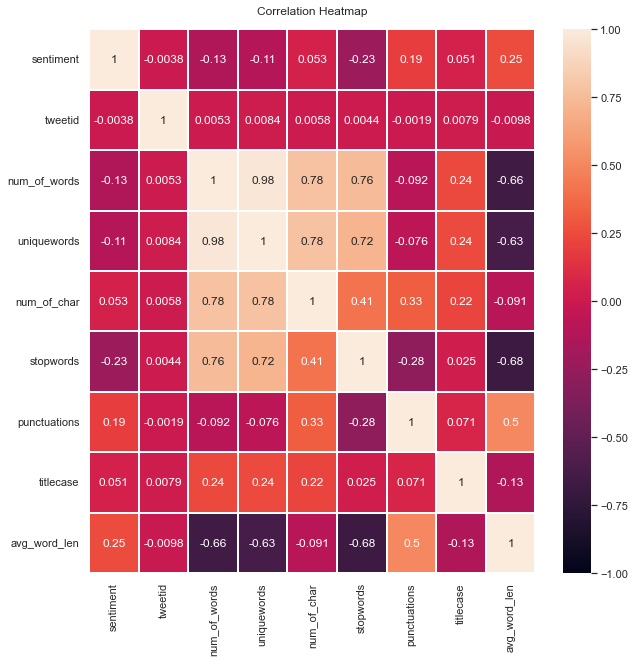

In [41]:
#specifying the size of the heatmap
fig, ax = plt.subplots(figsize=(10, 10))

#creating the heatmap
heatmap = sns.heatmap(train.corr(), linewidths=.3, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=15);

- Similar to the correlation relationships found earlier, the heatmap shows features exhibiting strong positive correlations in white boxes while moderate positive correlating features are in dusty pink boxes. Found in the purple/black boxes are the moderate negative correlating features. The weak correlations are indicated by orange, red and pink boxes. 


### Word Frequencies

In this section, before the raw data is cleaned, graphics displaying the most commonly used **words** by all classes will be displayed, with the goal of improving the understanding of the data in order to detect any valuable changes.

<div class="alert alert-block alert-success">
<b> 30 Commonly Used Words
</div> 

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

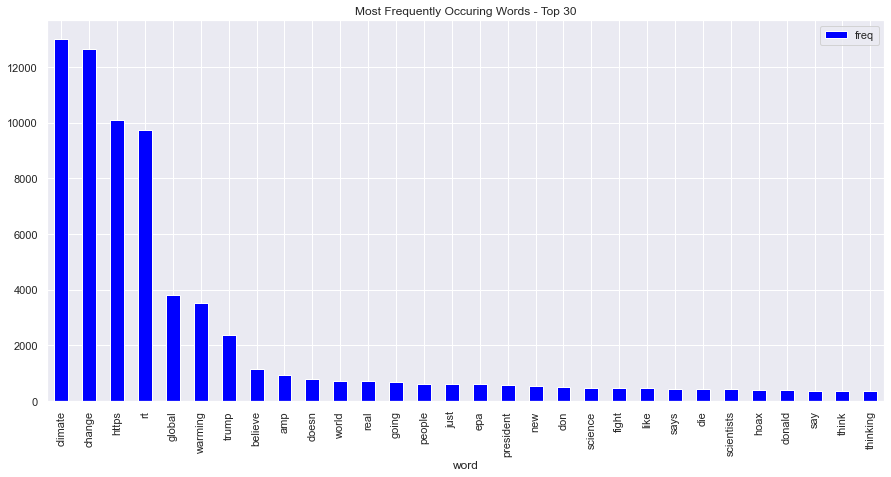

In [42]:
# checking the frequency distribution of each word in the train data using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer


cvector = CountVectorizer(stop_words = 'english')
words = cvector.fit_transform(train.message)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cvector.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


- The graph above depicted the top 30 commonly used words in the tweets. Climate, 'change, https, and rt were the most frequently used words, with counts of 9800 or higher. The Data Engineering team cleaned up the tweets data, removing the noise and punctuation problems, including words like https and rt. 


- WordCloud was also used to visualize the distribution of the most commonly used words in each class independently. Wordcloud, also known as a tagcloud, is a visual depiction of word frequency that emphasizes words that appear more frequently in a source text. The larger the word in the picture, the more prevalent the word was in the document (s). WordClouds is an excellent tool for visualizing unstructured text data and gaining insights into trends and patterns.


<div class="alert alert-block alert-success">
<b> Word Cloud
</div> 


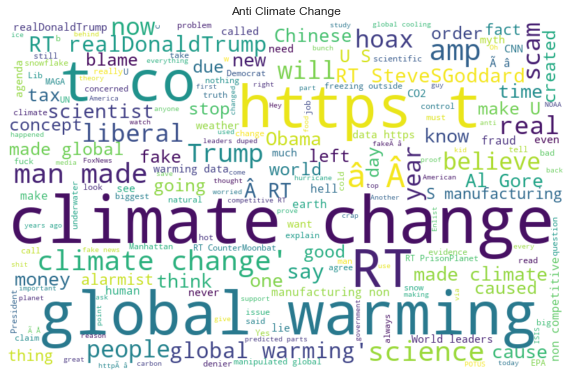

In [43]:
# importing wordcloud
from wordcloud import WordCloud

# checking the normal words used by Anti climate change messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == -1]])

wordcloud = WordCloud(background_color = 'white',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Anti Climate Change')
plt.show()

- A good thing to note was how words such as "CO" did not appear in the top 30 commonly used words within the frequency plot but according to the wordcloud such words should have appeared frequently within the tweet documents. 

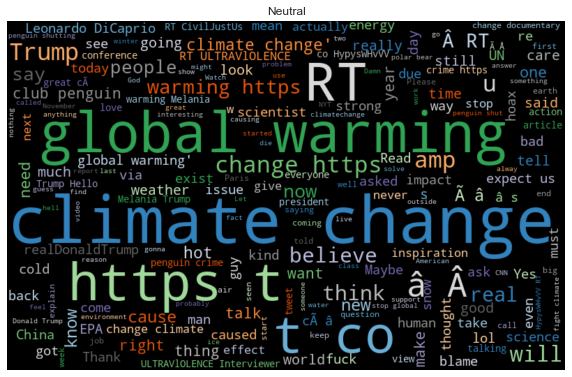

In [44]:
# checking the naumal words used by Neutral messages using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 0]])

wordcloud = WordCloud(colormap='tab20c',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Neutral')
plt.show()

- A similar result to that of the `anti` class in terms of the word "CO" seemed to also appear in the word cloud for the `neutral` class. And a similar reasoning could be applied tp explain the observation. 

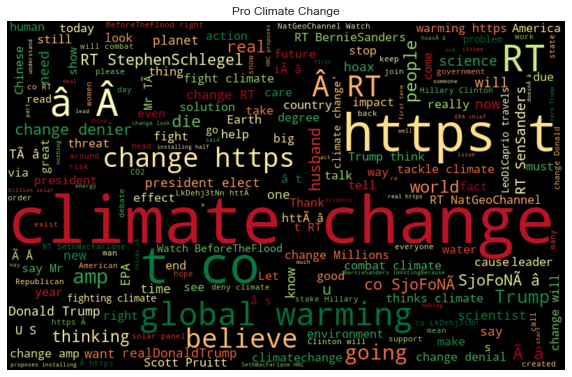

In [45]:
# checking the normal words used by Pro Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 1]])

wordcloud = WordCloud(colormap='RdYlGn',
                      width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Pro Climate Change')
plt.show()

- The `pro` class also showed that the word "CO", had a high frequency within the tweet documents. This result was omitted by the frequency table above.

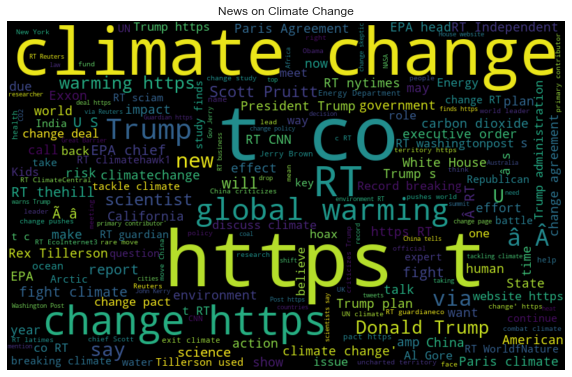

In [46]:
# checking the normal words used by News on Climate Change using wordcloud
normal_words =' '.join([text for text in train['message'][train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, 
                      height=500, 
                      random_state = 0, 
                      max_font_size = 110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('News on Climate Change')
plt.show()

- As with all other word clouds for the other classes, the word "CO" was ommitted by the frequency table previously plot.

Looking at the resulting word cloud visuals, it was clear to note that a word cloud plot sheds better light into representing the most frequently used words as compared to frequency plots. 


- Next step was to extract hashtags fro  the message feature and plot the most frequently used hashtags in each sentiment class respectively.

<div class="alert alert-block alert-success">
<b> Extracting Hashtags
</div> 
    
The hashtags were extracted using the function below:

In [47]:
# creating hashtags extraction function

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [48]:
# extracting hashtags from anti climate change sentiment
HT_anti = hashtag_extract(train['message'][train['sentiment'] == -1])

# extracting hashtags from neutral on climent change sentiment
HT_neutral = hashtag_extract(train['message'][train['sentiment'] == 0])

# extracting hashtags from pro climent change sentiment
HT_pro = hashtag_extract(train['message'][train['sentiment'] == 1])

# extracting hashtags from news on climent change sentiment
HT_news = hashtag_extract(train['message'][train['sentiment'] == 2])

# unnesting list
HT_anti = sum(HT_anti, [])
HT_neutral = sum(HT_neutral, [])
HT_pro = sum(HT_pro, [])
HT_news = sum(HT_news, [])

**Ploting the top 10 hashtag distribution of each class**

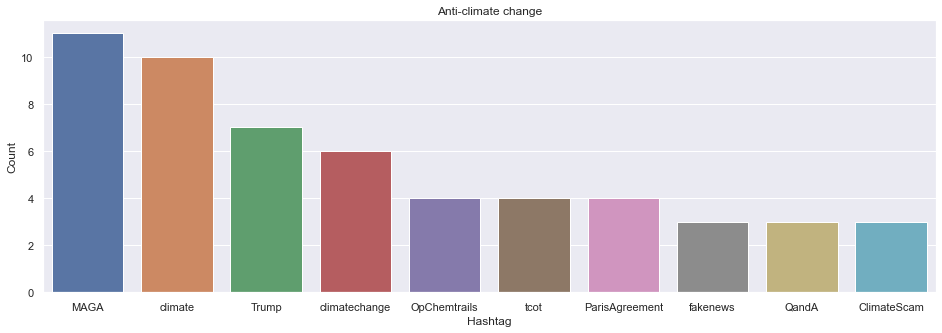

In [49]:
a = nltk.FreqDist(HT_anti)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Anti-climate change")
plt.show()

- The three commonly used hashtags in the `anti` class were: MAGA > Climate > Trump. 

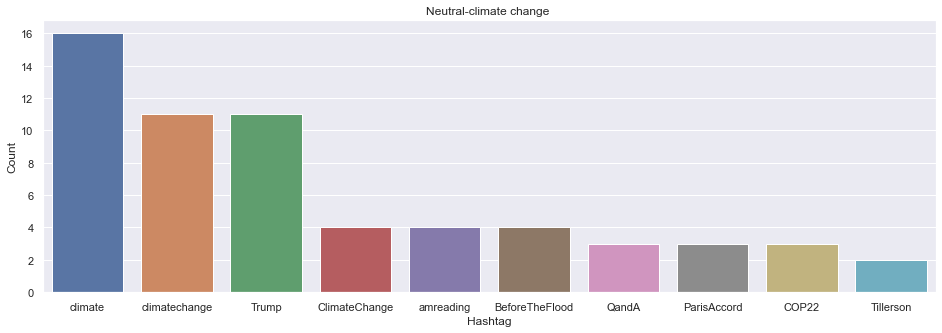

In [50]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Neutral-climate change ")
plt.show()

- The three commonly used hashtags in the `neutral` class were climate > climatechange > Trump. From this visual it could also be noted that the `climatechange` and `ClimateChange` words were being interpreted to be different (hence appearing in separate bins) even though they mean the same thing. This issue will be resolved in **Data Engineering**.

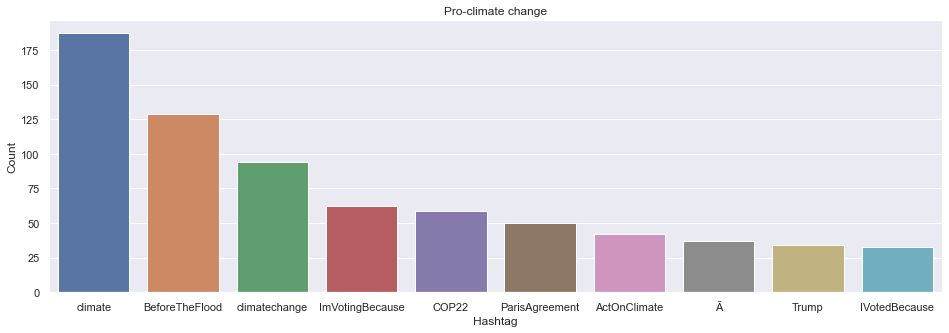

In [51]:
a = nltk.FreqDist(HT_pro)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("Pro-climate change")
plt.show()

- The three commonly used hashtags in the `pro` class were climate > BeforeTheFlood > climatechange. 

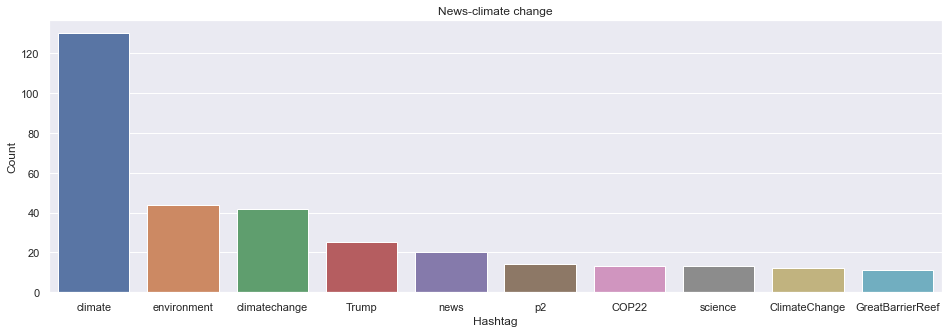

In [52]:
a = nltk.FreqDist(HT_news)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.title("News-climate change")
plt.show()


- The three commonly used hashtags in the `news` class were climate > environment > climatechange. 

From all the classes, an interesting observation was to note how the `pro` was the only class much less political having the "Trump hashtag" sitting in the ninth position as compared to the third and fourth positions in the other classes. 


    

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
In Data Science, the performance of the model is dependent on data preprocessing and data handling. Suppose if we build a model without handling data, we got an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more. Simply, by using Feature Engineering we improve the performance of the model.

- In this section, the team focused on two key things:

- (1) Text cleaning
- (2) Text feature extraction



### 4.1. Text Cleaning

Cleaning text data is a typical job in Natural Language Processing (NLP). To achieve the best results, text data should be reduced to the most significant root words in the corpus. The practice of repairing or deleting inaccurate, corrupted, improperly formatted, duplicate, or missing data from a dataset is referred to as text cleaning. In other words, it entails converting material into a more digestible format in order for machine learning algorithms to function better. For obtaining adequate text data, this method frequently necessitates numerous processes and techniques. Properly cleansed data will assist us in doing effective text analysis and generating correct conclusions for our business challenges. As a result, text preparation for machine learning is a critical step.


- For the train and test dataset, text cleaning includes the following four main subsections. 
- (a) Noise Removal
- (b) Tokenization
- (c) Lemmatization
- (d) Stopwords removal
 
<div class="alert alert-block alert-success">
<b> (a) Noise Removal
</div> 
    
In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format. This process is critical to removing text and characters that are not important to the analysis. Text such as URLs, noncritical items such as hyphens or special characters, web scraping, HTML, and CSS information are discarded. Some techniques are standard, but our own data requires some creative thinking on our part. 


The noise removal phase consisted of the several steps involving:

 -  Transforming all text to lower case
 -  Removing web-urls, colons, @, #, etc.
 -  Remoivng punctuation
 -  Removing printables


<div class="alert alert-block alert-success">
<b> (b) Tokenization
</div> 
    
Tokenization breaks the text into smaller sequences of tokens,  which roughly correspond to "words" versus large chunks of text. The reason for tokenization is because a machine cannot understand sentences or words until they’re separated. Special care has to be taken when breaking down terms so that logical units are created. Most software packages handle edge cases (U.S. broke into the US and not U and S), but it’s always essential to ensure it’s done correctly.

- For this project, the TreebankWordTokenizer was used to make the data ready for analysis. 


<div class="alert alert-block alert-success">
<b>  (c) Lemmatization
</div> 

Lemmatization is the process of grouping words of similar meaning together. So, the root stem, meaning the word one will end up with, is not something that can be looked up in a dictionary, but one can look up a lemma.


Stemming is a similar process to lemmatizing, except it works by removing characters from the beginning or end of a word to reduce it to their stem. An example of stemming would be to reduce “runs” to “run” as the base word dropping the “s,” where “ran” would not be in the same stem. However, Lemmatization would classify “ran” in the same lemma.

For this reason, lemmatization was prefered over stemming and the WordNetLematoizer was used for the process.

  
<div class="alert alert-block alert-success">
<b>  (d) Stopwords removal
</div>
    
Stop words are common words that appear but do not add any understanding or contain important significance to be used in Search Queries. Words such as “a” and “the” are examples. These words also appear very frequently, become dominant in analysis, and obscure the meaningful words. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information. NLTK has a corpus of stopwords.
All stop words were removed from the train and test datasets. 
    

<div class="alert alert-block alert-success">
<b> Noise Removal
</div>
    
Below is a function written to perform all the text cleaning tasks simultaneously. 

In [53]:
# function to remove noise
def text_cleaner(df):
    # Lower the text
    df['message'] = df['message'].str.lower()

    # Remove web-urls
    pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    subs_url = ' '
    df['message'] = df['message'].replace(to_replace = pattern_url, 
                                            value = subs_url, regex = True)

    # Remove text with colons
    df['message'] = df['message'].replace(r'^.+:', '', regex=True)

    # Remove words starting with @
    pattern = r'@\w+'
    subs = ''
    df['message'] = df['message'].replace(to_replace = pattern, 
                                            value = subs, regex = True)

    # Remove words starting with #
    patt = r'#\w+'
    sub = ''
    df['message'] = df['message'].replace(to_replace = patt, 
                                            value = sub, regex = True)
    
    # Remove printables
    df['message'] = df['message'].apply(lambda x: ''.join(["" if  i not in set(printable) 
                                                           else i for i in x]))

    return df

In [54]:
train = text_cleaner(train)
train.head()


,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
0,1,polyscimajor epa chief doesn't think carbon di...,625221,pro,19,19,140,3,12,0,6.421053
1,1,it's not like we lack evidence of anthropogeni...,126103,pro,10,10,62,4,1,0,5.300000
2,2,researchers say we have three years to act on...,698562,news,19,19,140,6,12,1,6.421053
3,1,2016 was a pivotal year in the war on climate...,573736,pro,15,15,99,5,8,0,5.666667
4,1,"it's 2016, and a racist, sexist, climate chan...",466954,pro,18,18,122,6,8,0,5.833333


In [55]:
test = text_cleaner(test)
test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,;..,224985
3,\nputin got to you too jill ! \ntrump does...,476263
4,'female orgasms cause global warming!'\n-sarc...,872928


In [56]:
#creating a function that removes punctuation from the data frame
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [57]:
# removing punctuation from the train data 
train['message'] = train['message'].apply(remove_punctuation)

In [58]:
train.head()

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,pro,19,19,140,3,12,0,6.421053
1,1,its not like we lack evidence of anthropogenic...,126103,pro,10,10,62,4,1,0,5.300000
2,2,researchers say we have three years to act on...,698562,news,19,19,140,6,12,1,6.421053
3,1,2016 was a pivotal year in the war on climate...,573736,pro,15,15,99,5,8,0,5.666667
4,1,its 2016 and a racist sexist climate change d...,466954,pro,18,18,122,6,8,0,5.833333


In [59]:
# removing punctuation from the test data 
test['message'] = test['message'].apply(remove_punctuation)

In [60]:
test.head()

,message,tweetid
0,europe will now be looking to china to make su...,169760
1,combine this with the polling of staffers re c...,35326
2,,224985
3,\nputin got to you too jill \ntrump doesn...,476263
4,female orgasms cause global warming\nsarcasti...,872928


- Now with all the necessary noise removal functions applied to the text data successfully, the nest step was to separate the text sentences into separate tokens, lemmas and remove any stop words from it. 

<div class="alert alert-block alert-success">
<b> Tokenization, Lemmatization and Stop Words removal
</div>

A single function that can perform all the three tasks was written and employed;

In [61]:
# Function for tokenization, lemmatization and removing stopwords
def tokenize_lemmatize_stopwords(df):
    
    # importing TreebankWordTokenizer
    from nltk.tokenize import TreebankWordTokenizer
    tokenizer = TreebankWordTokenizer()

    # importing WordNetLemmatizer
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    #import stopwords
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
   
    #tokenize
    df['message'] = df['message'].apply(tokenizer.tokenize)

    # lemmatize
    df['message'] = df['message'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # remove stopwords
    df['message'] = df['message'].apply(lambda x: [word for word in x 
                                                   if word not in stop_words])

    return df



In [62]:
# appling the tokenize_lemmatize_stopwords function to the train data
train = tokenize_lemmatize_stopwords(train)


In [63]:
train.head()

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
0,1,"[polyscimajor, epa, chief, doesnt, think, carb...",625221,pro,19,19,140,3,12,0,6.421053
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103,pro,10,10,62,4,1,0,5.300000
2,2,"[researcher, say, three, year, act, climate, c...",698562,news,19,19,140,6,12,1,6.421053
3,1,"[2016, wa, pivotal, year, war, climate, change]",573736,pro,15,15,99,5,8,0,5.666667
4,1,"[2016, racist, sexist, climate, change, denyin...",466954,pro,18,18,122,6,8,0,5.833333


In [64]:
# appling the tokenize_lemmatize_stopwords function to the test data
test = tokenize_lemmatize_stopwords(test)
test.head()

,message,tweetid
0,"[europe, looking, china, make, sure, alone, fi...",169760
1,"[combine, polling, staffer, climate, change, w...",35326
2,[],224985
3,"[putin, got, jill, trump, doesnt, believe, cli...",476263
4,"[female, orgasm, cause, global, warming, sarca...",872928


- The text data has now been cleaned, tokenized and lemmatized. after which the text tokens were then converted to corpus. This is an important step that removes all the delimiters before vectorization. 

<div class="alert alert-block alert-success">
<b> Conversion to Corpus
</div>


In [65]:
# Corpus function
def convert_to_corpus(data, col):
    def operation(word_list):
        string = ' '.join(word_list)
        return string
    
    df = data.copy()
    df[col] = df[col].apply(operation)
    
    return df

In [66]:
# apply corpus function to train data
train = convert_to_corpus(train, 'message')
train.head()

,sentiment,message,tweetid,class,num_of_words,uniquewords,num_of_char,stopwords,punctuations,titlecase,avg_word_len
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,pro,19,19,140,3,12,0,6.421053
1,1,like lack evidence anthropogenic global warming,126103,pro,10,10,62,4,1,0,5.300000
2,2,researcher say three year act climate change late,698562,news,19,19,140,6,12,1,6.421053
3,1,2016 wa pivotal year war climate change,573736,pro,15,15,99,5,8,0,5.666667
4,1,2016 racist sexist climate change denying bigo...,466954,pro,18,18,122,6,8,0,5.833333


In [67]:
# apply courpus function to test data
test = convert_to_corpus(test, 'message')
test.head()

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,,224985
3,putin got jill trump doesnt believe climate ch...,476263
4,female orgasm cause global warming sarcastic r...,872928


### 4.2 Text Feature Extraction

The process of converting text data into numbers is called Feature Extraction from the text. It is also called text vectorization.
Text feature extraction also known as text vectorization, refers to the process of transforming raw text data into numerical features that can be processed while preserving the information in the original data set. It yields better results than applying machine learning directly to the raw data. Text feature helps to reduce the amount of redundant data from the data set. In the end, the reduction of the data helps to build the model with less machine effort and also increases the speed of learning and generalization steps in the machine learning process.

The bag-of-words (BoW) model is one of the simplest text feature extraction techniques, used in many natural language processing (NLP) applications such as text classification, sentiment analysis, and topic modeling. This same model will be applied in this project for analysis. 


<div class="alert alert-block alert-success">
<b> Bag of Words Model
</div>



In [68]:
# Create bag of words with max features of 2500, ngram range of (1, 4).
cv = CountVectorizer(max_features=2500, ngram_range=(1, 4))
X = cv.fit_transform(train["message"]).toarray()
Y = train["sentiment"]


# creating bag of words for the test data
x_test_data = cv.fit_transform(test["message"]).toarray()

- Now that bags of words have been successfully created in both train and test dataset, next step is to compute the IDF values by calling tfidf_transformer.fit(x) on the word counts we computed earlier. 


#### TF-IDF Feature Extraction 

TF-IDF (term frequency-inverse document frequency) is a statistical measure used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus). This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents. 
TF-IDF we considers overall document weightage of a word. It helps when dealing with most frequent words. Using it can penalize such words. TfidfVectorizer weights the word counts by a measure of how often they appear in the documents. Even though the Bag of Words model vectors are easy to interpret, TF-IDF usually performs better in machine learning models.


<div class="alert alert-block alert-success">
<b> TF-IDF Transformer
</div>

In [69]:
# importing TF-IDF transformer
from sklearn.feature_extraction.text import TfidfTransformer 

# for the train data
tfidf = TfidfTransformer(smooth_idf=True,use_idf=True) 

# Transform x values using TF-IDF transformer
X = tfidf.fit_transform(X)


# Transform x_test_data values using TF-IDF transformer
x_test_data = tfidf.fit_transform(x_test_data)


 After computing the IDF values, the data must be balanced. Previously, during EDA, a bar plot demonstrated that the data among the four classes of interest was not balanced, with the 'pro' class having the greatest data values when compared to the other classes. A balanced data set for a model results in greater accuracy models, higher balanced accuracy, and a higher balanced detection rate. As a result, a balanced data set is essential for a classification model. Balancing a dataset facilitates model training by preventing the model from becoming biased towards one class. In other words, simply because there is more data, the model will no longer favor the majority class.

    
There are several ways to resolve the problems of imbalanced data such as undersampling, oversampling or using the Synthetic Minority Oversampling Technique (SMOTE) method. SMOTE is a statistical technique for increasing the number of cases in your dataset in a balanced way. It is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them. SMOTE synthesises new minority instances between existing minority instances. This balancing technique was utilized in this project. 

 
 
<div class="alert alert-block alert-success">
<b> Data Balancing 
</div>




In [70]:
# Define SMOTE-Tomek Links
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
x, y = resample.fit_resample(X, Y)


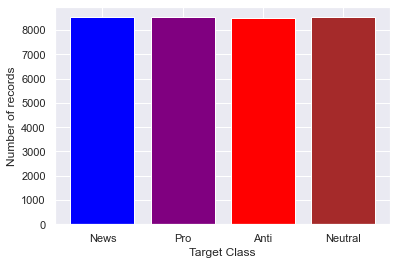

In [71]:
# balancing the classes
# isolating all the classes in the y column 
Anti = y[y == -1]
Neutral = y[y == 0]
Pro = y[y== 1]
News = y[y== 2]

# plotting the total sentiment features on a bar graph
labels = y.unique()
heights = [len(Anti),len(Neutral), len(Pro), len(News)]
plt.bar(labels, heights, color=['red','brown','purple','blue'])
plt.xticks(labels,['Anti','Neutral', 'Pro', 'News'])
plt.ylabel("Number of records")
plt.xlabel('Target Class')
plt.show()

- The figure showed an evenly distributed dataset in contrast to the starting data sample shown in the EDA section. Next step was to scale the data by standardization as a way of handling the outliers if any.



<div class="alert alert-block alert-success">
<b> Data Splitting
</div>  




In [72]:
# spliting the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, 
                                                    test_size = 0.20, random_state = 42)

print(x_train.shape)  
print(x_test.shape) 
print(y_train.shape)  
print(y_test.shape)  

(27277, 2500)
(6820, 2500)
(27277,)
(6820,)


- WIth the data successfully split into train and test datasets, the next step was to play around with class weights. 

Specifying class weights in the original dataset while buiding a machine learning model is an alternative to the balancing method employed earlier. This permits the algorithm to give more importance to minority classes. Class weights can be calculated through the class_weight() function of the sklearn.utils library.

<div class="alert alert-block alert-success">
<b>Class Weights 
</div>

In [73]:
# computing the class wieght of the data sklearn.utils.class_weight
classes = np.unique(y_train)
cw = compute_class_weight(class_weight= 'balanced',
                          classes = np.unique(y_train),
                          y = y_train)
weights = dict(zip(classes, cw))
weights


{-1: 0.9998900293255132,
 0: 0.9963836937463472,
 1: 0.9958016939252337,
 2: 1.008019216555802}


- Now it would be easier to provide the class weights as input to a classifier, for example a DecisionTreeClassifier, and calculate the performance of the model. 

    
With the data now in a format that a machine learning model could understand, in other words with the data ready for model training. The process of training various models began in the next phase. 


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
To make predictions for the target variable, `sentiment`, we will create five regression models in the listed order:

**Logistic Regression** : Serves as the base model, and  it uses a logistic function to model the dependent variable. 

**KNeighbors Classifier**: works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).

**Decision Tree Classifier**: A model that works by partitioning data into subsets using recursive binary splitting such that the resulting subset has minimised Mean Square Error. 

**SVC** : works by mapping data points to a high-dimensional space and then finding the optimal hyperplane that divides the data into two classes

**Random Forest Classifier** : It is an ensemble bagging model based on decision trees that works by training on different subsets of the same data with an aim of reducing variance error.  


All models will be trained by following the same procedure as highlited in the following steps:
- 1. A classifier model object will be created.

- 2. The model will get fit to the training dataset.

- 3. Predictions will be made by the model using the validation dataset.

<div class="alert alert-block alert-success">
<b> 5.1. Logistic Regression 
</div> 


f1 score : 0.7271260997067449
[[1440  169   50   28]
 [ 260 1160  173   93]
 [ 240  210 1021  211]
 [ 191  110  126 1338]]


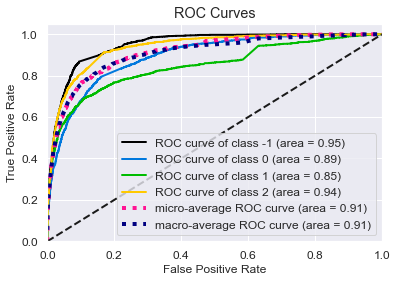

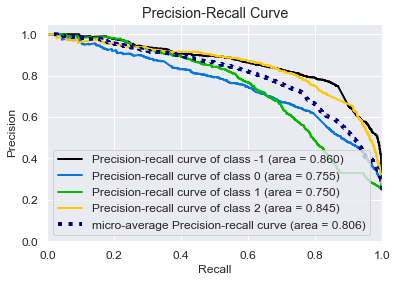

In [74]:
# training and testimg Logistic Regression model on the data
lgr = LogisticRegression(C= 100, class_weight = weights, multi_class='ovr')
lgr.fit(x_train, y_train)

y_score = lgr.predict_proba(x_test)
y_pred_lr = lgr.predict(x_test)


# calculating the f1 score for the x_test set
Log_classifier  = f1_score(y_test, y_pred_lr,
                            pos_label='positive',
                             average='micro')
    
print("f1 score :", Log_classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()



Though the Logistic regression model was been trained on the data, it showed a relatieely good predicting capacity giving the F1 mean score value. Next up in analysis was the KNeighors Classifier. 



<div class="alert alert-block alert-success">
<b> 5.2 KNeighbors Classifier 
</div> 



f1 score : 0.7200879765395894
[[1579   79    0   29]
 [ 176 1426   16   68]
 [ 395  477  510  300]
 [ 218  129   22 1396]]


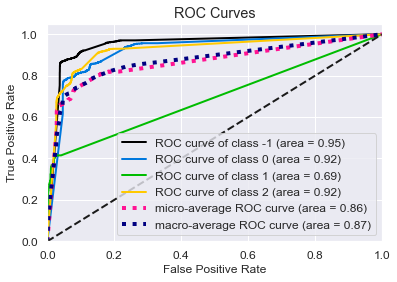

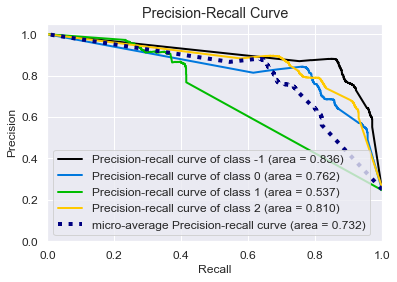

In [75]:
# training, testing and visualizing the data using KNeighborsClassifier

knc = KNeighborsClassifier(weights='distance', n_neighbors = 3)
knc.fit(x_train, y_train)

y_score = knc.predict_proba(x_test)
y_pred_kn = knc.predict(x_test)

# calculating the f1 score for the x_test set
KNeigh_Classifier = f1_score(y_test, y_pred_kn,
                            pos_label='positive',
                             average='micro')

print("f1 score :", KNeigh_Classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_kn)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

- Eve though the KNeighbors Classifier predicted a little better than the Logostic regression, the mean F1 score from this model shows a relatively good ability to predict the sentiment class, more models were further exploited. 

<div class="alert alert-block alert-success">
<b> 5.3 Decision Tree Classifier
</div> 



f1 score : 0.6891495601173021
[[1282  199   98  108]
 [ 176 1097  238  175]
 [ 138  213  985  346]
 [  64  179  186 1336]]


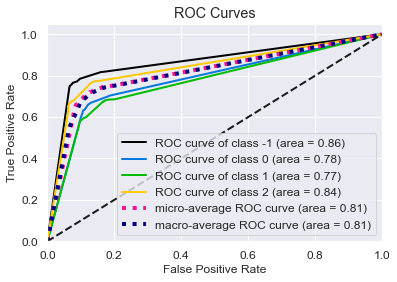

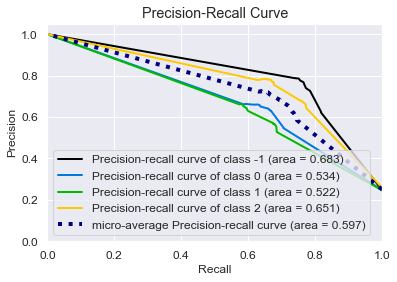

In [76]:
# training, testing and visualizing the data using DecisionTreeClassifier

dtc = DecisionTreeClassifier(min_samples_split= 4, class_weight=weights)
dtc.fit(x_train, y_train)

y_score = dtc.predict_proba(x_test)
y_pred_dtc = dtc.predict(x_test)

# calculating the f1 score for the x_test set
Dec_tree_classifier = f1_score(y_test, y_pred_dtc,
                            pos_label='positive',
                             average='micro')

print("f1 score :", Dec_tree_classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_dtc)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

- The Decision Tree Classifier gave a relatively good result also considering the F1 score. The SVC Classifier was considered next. 

<div class="alert alert-block alert-success">
<b> 5.4 SVC Classifier
</div>


f1 score : 0.8077712609970674
[[1571   66   33   17]
 [ 279 1247  138   22]
 [ 134   63 1357  128]
 [ 254   52  125 1334]]


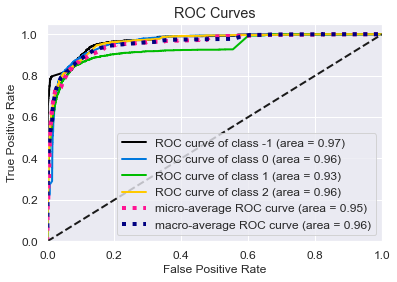

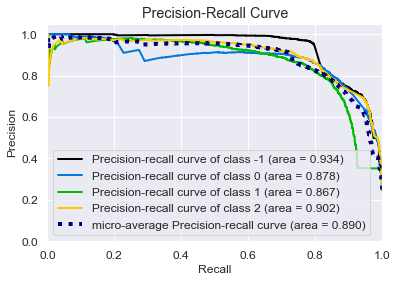

In [77]:
# training, testing and visualizing the data using support vector classifier(SVC)
svc = SVC(probability=True, class_weight=weights, kernel= 'rbf')
svc.fit(x_train, y_train)

y_score = svc.predict_proba(x_test)
y_pred_svc = svc.predict(x_test)


# calculating the f1 score for the x_test set
support_vector = f1_score(y_test, y_pred_svc,
                            pos_label='positive',
                             average='micro')

print("f1 score :", support_vector)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

- The SVC classifier gave better results compared to the previous three models which were trained and assessed. Hoever it was noted that the SVC model consumes more time for analysis and another model was assed. 


<div class="alert alert-block alert-success">
<b> 5.5 Random Forest Classifier
</div>


f1 score : 0.7743401759530791
[[1409  151   46   81]
 [  82 1329  162  113]
 [  77  185 1085  335]
 [  36  145  126 1458]]


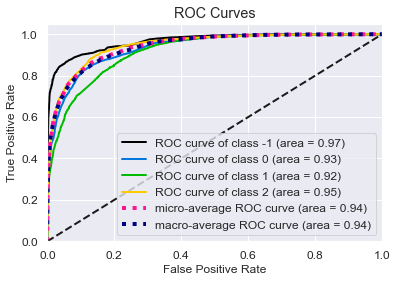

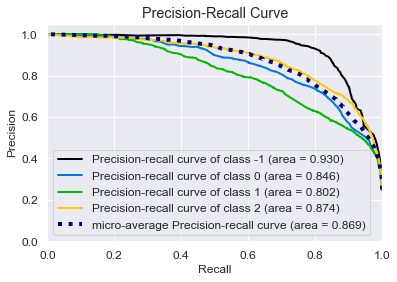

In [78]:
# training, testing and visualizing the data using RandomForestClassifier

rf = RandomForestClassifier(class_weight = weights, n_estimators=79)
rf.fit(x_train, y_train)

y_score = rf.predict_proba(x_test)
y_pred_rf = rf.predict(x_test)


# calculating the f1 score for the x_test set
RF_Classifier = f1_score(y_test, y_pred_rf,
                            pos_label='positive',
                             average='micro')

print("f1 score :", RF_Classifier)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)


# Plot metrics 
plot_roc(y_test, y_score)
plt.show()
    
plot_precision_recall(y_test, y_score)
plt.show()

- The Random Forest classifier gave a relatively better results than other models previously considered.

<a id="one"></a>
## 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

---

In [79]:
# Store the values in a dictionary
F1_score_all = {'logic regression': Log_classifier,
               'KNeighbour': KNeigh_Classifier,
                'decision tree': Dec_tree_classifier,
                  'random forest': RF_Classifier ,
                'Support Vector': support_vector}

#Display the f1_score values
F1_score_all

{'logic regression': 0.7271260997067449,
 'KNeighbour': 0.7200879765395894,
 'decision tree': 0.6891495601173021,
 'random forest': 0.7743401759530791,
 'Support Vector': 0.8077712609970674}

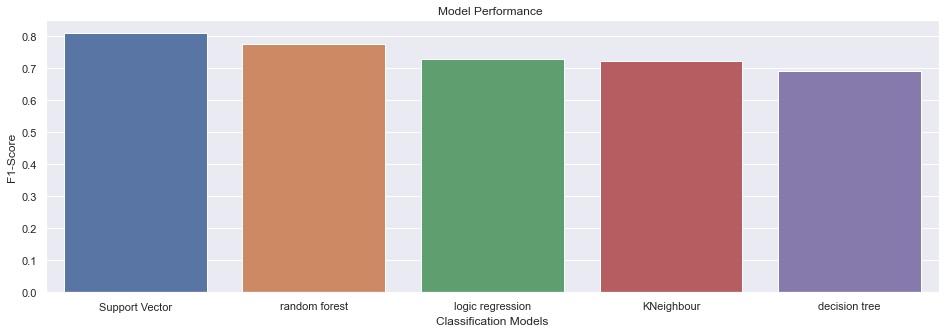

In [80]:
# generating a bar graph of F1 scores visualizing the best performing model.

c = pd.DataFrame({'Classification Models': list(F1_score_all.keys()),
                 'F1-Score': list(F1_score_all.values())})


# ploting the bar graph     
c = c.nlargest(columns='F1-Score', n = 5) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=c, x= "Classification Models", y = 'F1-Score')
ax.set(ylabel = 'F1-Score')
plt.title("Model Performance ")
plt.show()


- As shown in the bar plot above, support vector classifier is the best model with an F1-Score of over 80 percent. Although the all the models that was trained performed relatetively well with a relatively high mean F1-Score. However, SVC perform best

<a id="six"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- This section covered inner depth explanations of how the various selected classifier models work going as further as the algorithms the models use to perform classifications.

<div class="alert alert-block alert-success">
<b> 7.1 Logistic Regression Classifier
</div> 

Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).
Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

#### Types of Logistic Regression
Generally, logistic regression means binary logistic regression having binary target variables, but there can be two more categories of target variables that can be predicted by it. Based on those number of categories, Logistic regression can be divided into following types: 

- (a) Binary or Binomial

In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.

- (b) Multinomial

In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

- (c) Ordinal

In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have the scores like 0,1,2,3.

#### Logistic Regression Assumptions

Before diving into the implementation of logistic regression, it was important to note that in the case of binary logistic regression, the target variables should be binary always and the desired outcome is represented by the factor level 1. There should not be any multi-collinearity in the model, which means the independent variables must be independent of each other. It is therefore important to include meaningful variables in the model. A larger sample size is also required for better precision and accuracy by the logistic regression classifier.

<div class="alert alert-block alert-success">
<b> 7.2 KNeighbors Classifier
</div>

The K-Nearest Neighbor (KNN) classifier is one of the introductory supervised classifiers whose algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to. KNN works on a principle assuming every data point falling in near to each other is falling in the same class. In other words, it classifies a new data point based on similarity. Its algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems. KNN is considered a lazy learning and non-parametric algorithm simply because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset. This makes KNN ideal for data mining.

To understand the concept of how KNN works, consider te example of two classes green and red and a data point which is to be classified below: 

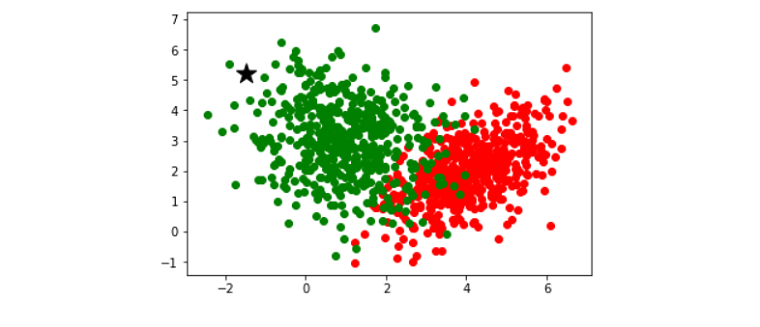

The above graphs show the same two classes red and green, a black data point which is to be classified by the algorithm either red or green. KNN algorithms decide a number k which is the nearest Neighbor to that data point that is to be classified. If the value of k is 5 it will look for 5 nearest Neighbors to that data point. 

In this example, if we assume k=4. KNN finds out about the 4 nearest Neighbors. All the data points near black data points belong to the green class meaning all the neighbours belong to the green class so according to the KNN algorithm, it will belong to this class only. The red class is not considered because red class data points are nowhere close to the black data point. 

The simple version of the K-nearest neighbour classifier algorithms is to predict the target label by finding the nearest neighbour class. The closest class to the point which is to be classified is calculated using Euclidean distance. 

#### Pros of KNN
 
- A simple algorithm that is easy to understand.

- Used for nonlinear data. 

- The versatile algorithm used for both classification as well as regression.

- Gives high accuracy but there are more good algorithms in supervised models.

- The algorithm doesn't demand to build a model, tune several model parameters, or make additional assumptions.
 
#### Cons of KNN
 
- The requirement of high storage.

- Prediction rate slow.

- Stores all the training data.

- The algorithm get slower when the number of examples, predictors or independent variables increases.

<div class="alert alert-block alert-success">
<b> 7.3 Decision Tree Classifier
</div>

Decision Trees are some of the most used machine learning algorithms. They are used for both classification and Regression. They can be used for both linear and non-linear data, but they are mostly used for non-linear data. Decision Trees as the name suggests works on a set of decisions derived from the data and its behavior. It does not use a linear classifier or regressor, so its performance is independent of the linear nature of the data. Boosting and Bagging algorithms have been developed as ensemble models using the basic principle of decision trees compiled with some modifications to overcome some important drawbacks of decision trees and provide better results. One of the other most important reasons to use tree models is that they are very easy to interpret.

Decision Trees can be used for both classification and regression. The methodologies are a bit different, though principles are the same. The decision trees use the CART algorithm (Classification and Regression Trees). In both cases, decisions are based on conditions on any of the features. The internal nodes represent the conditions and the leaf nodes represent the decision based on the conditions.

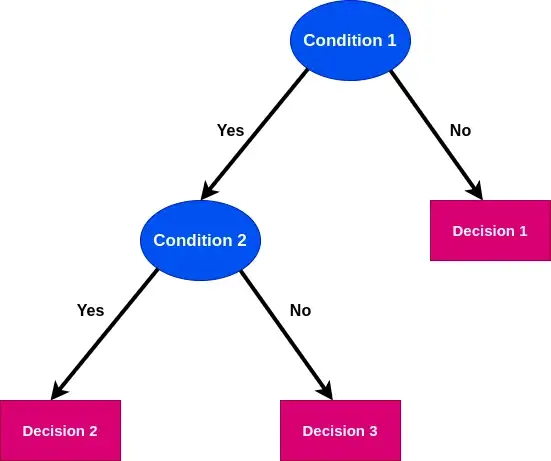

On each step or node of a decision tree, used for classification, we try to form a condition on the features to separate all the labels or classes contained in the dataset to the fullest purity

    
<div class="alert alert-block alert-success">
<b> 7.4 Support Vector Classifier
</div>

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text. Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

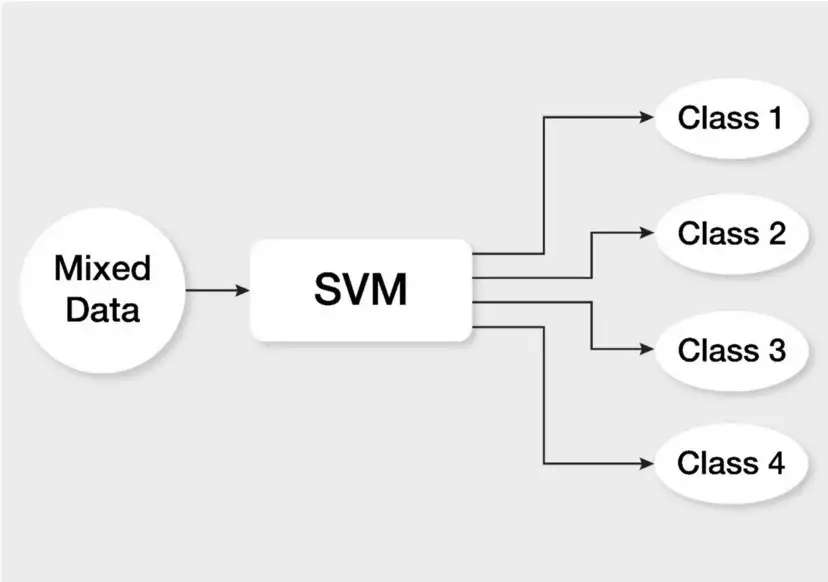

According to the SVM algorithm we find the points closest to the line from both the classes.These points are called support vectors. Now, we compute the distance between the line and the support vectors. This distance is called the margin. Our goal is to maximize the margin. The hyperplane for which the margin is maximum is the optimal hyperplane. Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.


<div class="alert alert-block alert-success">
<b> 7.5 Random Forest Classifier
</div>

Random forest is a flexible, easy-to-use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most-used algorithms, due to its simplicity and diversity (it can be used for both classification and regression tasks).

Random forest is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result. Put simply: random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction. 

- One big advantage of random forest is that it can be used for both classification and regression problems, which form the majority of current machine learning systems.

The image below shows how a random forest would look like with two trees:

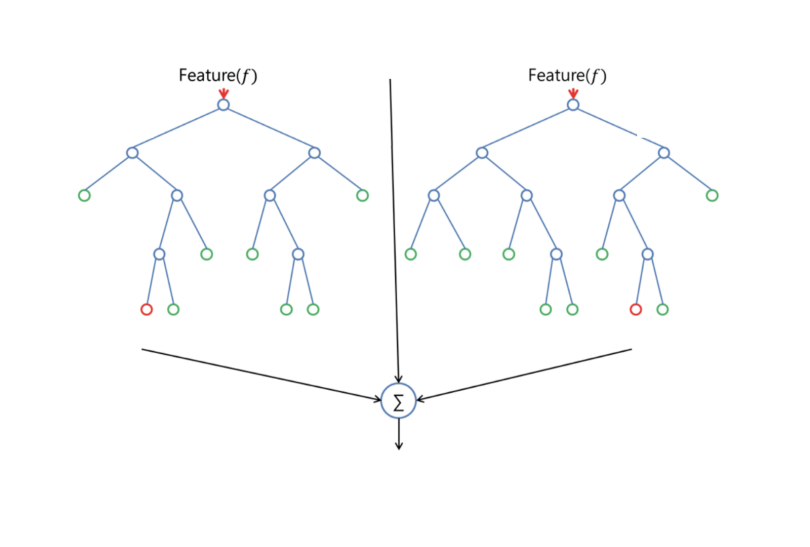

Random forest has nearly the same hyperparameters as a decision tree or a bagging classifier. Fortunately, there’s no need to combine a decision tree with a bagging classifier because you can easily use the classifier-class of random forest. With random forest, one can also deal with regression tasks by using the algorithm’s regressor.

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model.

Therefore, in a random forest, only a random subset of the features is taken into consideration by the algorithm for splitting a node. One can even make trees more random by additionally using random thresholds for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

<a id="six"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


- The objective of this project was to build a robust classifier model capable of prediciting the sentiment of twitter users with regard to their messages on twitter as it concern climent change. After extracting thousands of messages from twitter, exploring the data and couciously clearning the data. **PARBI Consultancy** team was able to come up with five(5) different classiffier models capable of predicting the sentiment of twitter users on climent change, with a 70-80% degree of accuracy. As a result of this, the team was able to build an APP called **PARBI CLASSIFIER**' that could predict the sentiment(class) of a text relating to climate Change 

<a id="six"></a>
## 9. Kaggle Model Submissions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

<div class="alert alert-block alert-success">
<b> 8.1 Logistic Regression
</div>


In [81]:
# predicting the sentiment of the test data
lr_sentiment = lgr.predict(x_test_data )

In [82]:
# store predictions in a dataframe
sentiment = pd.DataFrame(lr_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
lr5_submission = tweetid.join(sentiment)

# write the result to a csv file
lr5_submission.to_csv('lr5_submission.csv', index = False)


<div class="alert alert-block alert-success">
<b> 8.2 KNeighbors Classifier
</div>

In [83]:
# make predictions for  target variable sing original test data
knc_sentiment = knc.predict(x_test_data)


In [84]:
# training the model with the whole data
knc.fit(x, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [85]:
# store predictions in a dataframe
sentiment = pd.DataFrame(knc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
knc4_submission = tweetid.join(sentiment)

# write the result to a csv file
knc4_submission.to_csv('knc4_submission.csv', index = False)


<div class="alert alert-block alert-success">
<b> 8.3 Decision Tree Classifier
</div>


In [86]:
# predicting the tests data
dtc_sentiment = dtc.predict(x_test_data)

In [87]:
# store predictions in a dataframe
sentiment = pd.DataFrame(dtc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
dtc6_submission = tweetid.join(sentiment)

# write the result to a csv file
dtc6_submission.to_csv('knc6_submission.csv', index = False)


<div class="alert alert-block alert-success">
<b>8.4 SVC Classifier
</div>


In [88]:
# predicting the sentiment of the test_data
svc_sentiment = svc.predict(x_test_data)

In [89]:
# store predictions in a dataframe
sentiment = pd.DataFrame(svc_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
svc9_submission = tweetid.join(sentiment)

# write the result to a csv file
svc9_submission.to_csv('svc9_submission.csv', index = False)


<div class="alert alert-block alert-success">
<b> 8.5 Random Forest Classifier
</div>


In [90]:
# predicting the sentiment of the test_data
rf_sentiment = rf.predict(x_test_data)

In [91]:
# store predictions in a dataframe
sentiment = pd.DataFrame(rf_sentiment, columns = ['sentiment'])

# get tweetid variable on a dataframe
tweetid = pd.DataFrame({'tweetid': test['tweetid']})

# combine tweetid dataframe with the sentiment dataframe
rf7_submission = tweetid.join(sentiment)

# write the result to a csv file
rf7_submission.to_csv('rf7_submission.csv', index = False)

<a id="six"></a>
## 10. References 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb

https://athena.explore-datascience.net/

https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669

https://towardsdatascience.com/from-raw-text-to-model-prediction-in-under-30-lines-of-python-32133d853407

https://builtin.com/data-science/random-forest-algorithm

https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989

https://www.tutorialspoint.com/machine_learning_with_python/classification_algorithms_logistic_regression.htm

https://www.analyticssteps.com/blogs/how-does-k-nearest-neighbor-works-machine-learning-classification-problem

https://towardsdatascience.com/a-dive-into-decision-trees-a128923c9298